# LAB 3
## Procesando	Texto	y	usando	scikit-learn 
SciKit-learn	es	una	biblioteca	de	Python	de	código	abierto	para	el	aprendizaje	de	máquinas	que	viene	con	instalaciones	básicas	para	el	procesamiento	de	texto	para	apoyar	el	agrupamiento	y	clasificación	-	incluyendo	tokenización,	conteo	de	palabras,	y	steamming	(obtener	la	forma	raíz	de	las	palabras).		En	este	lab	práctico	vamos	a	revisar	brevemente	cómo	utilizar	SciKit-learn	en	Python		y	luego	observar	con	más	detalle	en	las	instalaciones	de	procesamiento	previo.	

#### SCIKIT LEARN Library
If you have not installed the NLTK library, you can do so by running the following command in the teriminal:
```bash
poetry add scikit-learn
```

In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


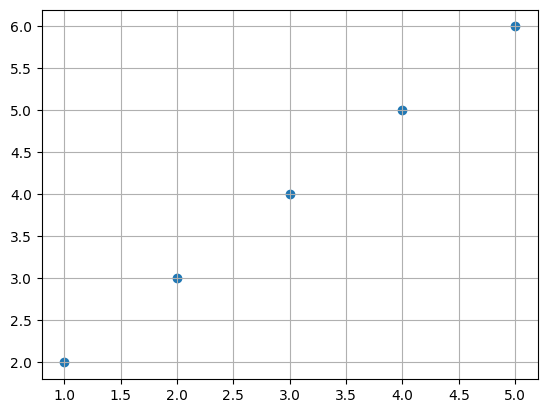

In [4]:
data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y)
plt.grid()
plt.show()

Una	vez	que	hemos	creado	la	instancia de CountVectorizer,	podemos	utilizarlo	para	extraer	una	bolsa	de	palabras	la	representación	de	una	colección	de	documentos	utilizando	el	método	scikit-learn	fit_transform.	En	este	primer	ejemplo	de	prueba,	usamos	una	lista	de	cadenas	como	documentos,	de	la	siguiente	manera:	

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)
print(X)


  (0, 3)	1
  (0, 6)	1
  (0, 1)	1
  (0, 4)	1
  (0, 2)	1
  (0, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 0)	1
  (1, 5)	1


fit_transform	ha	extraído	siete	características	de	los	dos	“documentos”;	podemos	ver	eso	con	el	método	get_feature_names().	

Tenga	en	cuenta	que	esta	llamada	devuelve	una	matriz	de	dos	filas,	una	por	`documentos'.	Cada	fila	de	siete	elementos.	Cada	elemento	especifica	el	número	de	elementos	de	una	determinada	feature	se	produjo	en	ese	documento.	Entonces:	

In [7]:
print(X.toarray())

[[1 1 1 1 1 0 1]
 [1 1 1 0 0 1 0]]


### Veamos	ahora	cómo	funciona	esto	con	una	verdadera	colección	de	documentos.		
Vamos	a	utilizar	los	datos	del	dataset	‘20	Newsgroups’,	que	es	una	colección	de	alrededor	de	20.000	documentos	procedentes	de	20	grupos	de	noticias	diferentes,	que	se	utiliza	comúnmente	en	experimentos	de	clasificación	de	texto	y	la	agrupación	de	texto.		

In [18]:
from sklearn.datasets import fetch_20newsgroups

# Para	acelerar	las	cosas,	en	el	resto	del	laboratorio	sólo	utilizaremos	un	subconjunto	de	los	documentos,	los	que	pertenecen	a	las	siguientes	4	categorías:	
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# Ahora	cargamos	los	documentos	de	estas	categorías	en	el	dataset	20	Newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

Theres an SSL error so we try to download the dataset manually and load it from the disk

In [26]:
# extract the gz file
import tarfile
import os
import urllib.request

url = "http://qwone.com/~jason/20Newsgroups/20news-19997.tar.gz"
file_path = "/Users/franciscomaver/PycharmProjects/NLP_PLAGIARISM/LABORATORIOS/20news-19997.tar.gz"
extract_path = "/Users/franciscomaver/PycharmProjects/NLP_PLAGIARISM/LABORATORIOS/"

if not os.path.exists(file_path):
    print("Downloading file")
    urllib.request.urlretrieve(url, file_path)
    tar = tarfile.open(file_path, "r:gz")
    tar.extractall(extract_path)
    tar.close()

else:
    print("File already exists")
    

# We load the dataset from the disk

In [27]:
#load the dataset from the disk
from sklearn.datasets import load_files

# Para	acelerar	las	cosas,	en	el	resto	del	laboratorio	sólo	utilizaremos	un	subconjunto	de	los	documentos,	los	que	pertenecen	a	las	siguientes	4	categorías:	
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = load_files("/Users/franciscomaver/PycharmProjects/NLP_PLAGIARISM/LABORATORIOS/20_newsgroups", categories=categories, shuffle=True, random_state=42)

# Los	archivos	han	sido	cargados	en	el	atributo	‘data’	del	objeto	twenty_train	

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

# fix the twenty_train.data from unicode errors
twenty_train_data = [str(i) for i in twenty_train.data]

X_train_counts = count_vect.fit_transform(twenty_train_data)

si	ahora	queremos	ver	la	frecuencia	de	la	palabra	'algorithm'	se	produce	en	el	subconjunto	de	la	colección	20Newgroups	estamos	considerando	la	siguiente	manera:	

In [33]:
count_vect.vocabulary_.get(u'algorithm')

13345

In [37]:
len(count_vect.get_feature_names_out())

67989

In [38]:
vectorizer = CountVectorizer(stop_words='english')
sorted(vectorizer.get_stop_words())[:20] 

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

# Pre-procesamiento	más	avanzado	con	NLTK	

In [39]:
import nltk

### Para	crear	un	steammer	de	Inglés	que	tiene	que	hacer	lo	siguiente:

In [41]:
s = nltk.stem.SnowballStemmer('english')

#### Después	de	crear	el	steammer,	a	continuación,	puede	utilizarlo	para	llevar	a	la	raíz	(steam)	palabras	de	la	siguiente	manera:	

In [42]:
s.stem('cats')

'cat'

In [43]:
s.stem('loving')

'love'

Otros	tipos	de	pre-procesamiento	de	NLTK	incluye	implementaciones	de	muchos	de	los	módulos	de	procesamiento	previo	y	analizadores	sintácticos	que	discutimos	o	discutiremos	en	las	clases:	
- identificadores	de	idioma	
- tokenizers	para	varios	idiomas	
- divisores	de	oraciones	
- POS	taggers	
- Chunkers	
- Parsers		

Además,	NLTK	incluye	implementaciones	de	los	aspectos	del	análisis	de	texto	que	vamos	a	discutir	en	este	módulo,	incluyendo
- NER	(Named	Entity	Recognition)
- Análisis	de	los	sentimientos	
- Extraer	información	de	los	medios	de	redes	sociales.	

In [2]:
from nltk.tokenize import word_tokenize
import nltk

text = word_tokenize("And now for something completely different")

nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

El	steammer	de	NLTK	puede	ser	utilizado	antes	de	la	alimentación	en	CountVectorizer	de	SciKit-learn,	obteniendo	así	un	índice	más	compacto.		Una	forma	de	hacer	esto	es	definir	una	nueva	clase	StemmedCountVectorizer	Extendiendo	de	CountVectorizer	y	redefiniendo	el	método	build_analyzer	()	que	se	encarga	de	pre-procesamiento	y	tokenización:	

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

Si		modificamos	build_analyzer	()	para	aplicar		el	steammer	de	NLTK	a	la	salida	del	método	build_analyzer	(),	obtenemos	una	versión	que	deriva	así:	

In [4]:
import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
    
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()

Y = stem_analyze("John bought carrots and potatoes")

for tok in Y:
    print(tok)

john
bought
carrot
potato


Si	utilizamos	este	Vectorizer	para	extraer	features	para	el	subconjunto	del	dataset	20_Newsgroups	que	consideramos	antes,	vamos	a	tener	un	menor	número	de	features:	

In [7]:
from sklearn.datasets import load_files

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = load_files("/Users/franciscomaver/PycharmProjects/NLP_PLAGIARISM/LABORATORIOS/20_newsgroups", categories=categories, shuffle=True, random_state=42)

twenty_train_string = [str(i) for i in twenty_train.data]

X_train_counts = stem_vectorizer.fit_transform(twenty_train_string)
len(stem_vectorizer.get_feature_names_out())

53625